<center>Universidade Estadual Paulista - UNESP</center>
<center>Faculdade de Engenharia de Ilha Solteira - FEIS</center>
<center>Departamento de Engenharia Mecânica - DEM</center>
<center>Programa de Pós-Graduação em Engenharia Mecânica - PPGEM</center>
<br>
<center><b>Disciplina: Dinâmica dos Sistemas Mecânicos</b></center>
<center><b>Pêndulo Simples parametrizado por x e y via Equações de Voronec</b></center>
<br>
<center><b>Docente:</b> Samuel da Silva</center>
<center><b>Discentes:</b> Estevão Fuzaro de Almeida</center>
<center>Henrique Cordeiro Novais</center>

---

In [30]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from scipy.integrate import odeint
import matplotlib.font_manager as font_manager
from matplotlib import rc

#Set the font dictionaries (for plot title and axis titles)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size': '18'})
rc('text', usetex=True)

### **1. Fazendo por $x$ e $y$.**

In [31]:
# Definindo as variáveis do problema
t, l, m, g = smp.symbols('t, l, m, g', real=True) # Tempo "t", Comprimento "l", Massa "m", Gravidade "g"
x, y = smp.symbols('x, y', cls=smp.Function) # x e y -> Coordenadas não-generalizadas
lbda = smp.symbols('\lambda',real=True)

In [32]:
# Deslocamentos
x = x(t)
y = y(t)

# Velocidades
xdot = smp.diff(x,t)
ydot = smp.diff(y,t)

# Acelerações
xddot = smp.diff(xdot,t)
yddot = smp.diff(ydot,t)

In [33]:
# Vínculo holônomo
f1 = x**2 + y**2 - l**2
# f1_ = (l**2 - x**2)**(-1/2)
f1_dot = smp.diff(f1,t)
y_dot = smp.solve(f1_dot,ydot)[0]
y_dot

-x(t)*Derivative(x(t), t)/y(t)

In [34]:
# Energia cinética
T = (1/2)*m*(xdot**2 + y_dot**2)
# Energia potencial
V = -m*g*y
# Lagrangiana reduzida
L_bar = T - V
L_bar

g*m*y(t) + 0.5*m*(x(t)**2*Derivative(x(t), t)**2/y(t)**2 + Derivative(x(t), t)**2)

In [35]:
# Principio de Hamilton
delL_delx = smp.diff(L_bar,x)
delL_delxdot = smp.diff(L_bar,xdot)
delL_dely = smp.diff(L_bar,y)

alj = y_dot/xdot
alj

-x(t)/y(t)

In [44]:
Voronec = smp.diff(delL_delxdot,t) - delL_delx - delL_dely*alj
Voronec


0.5*m*(2*x(t)**2*Derivative(x(t), (t, 2))/y(t)**2 - 4*x(t)**2*Derivative(x(t), t)*Derivative(y(t), t)/y(t)**3 + 4*x(t)*Derivative(x(t), t)**2/y(t)**2 + 2*Derivative(x(t), (t, 2))) - 1.0*m*x(t)*Derivative(x(t), t)**2/y(t)**2 + (g*m - 1.0*m*x(t)**2*Derivative(x(t), t)**2/y(t)**3)*x(t)/y(t)

In [45]:
xddot_ = smp.solve(Voronec,xddot,simplify=True, rational=False)[0]
xddot_func = smp.lambdify((g,x,y,xdot,ydot))

(-1.0*g*y(t)**3 + 1.0*x(t)**2*Derivative(x(t), t)**2 + 2.0*x(t)*y(t)*Derivative(x(t), t)*Derivative(y(t), t) - 1.0*y(t)**2*Derivative(x(t), t)**2)*x(t)/((x(t)**2 + y(t)**2)*y(t)**2)

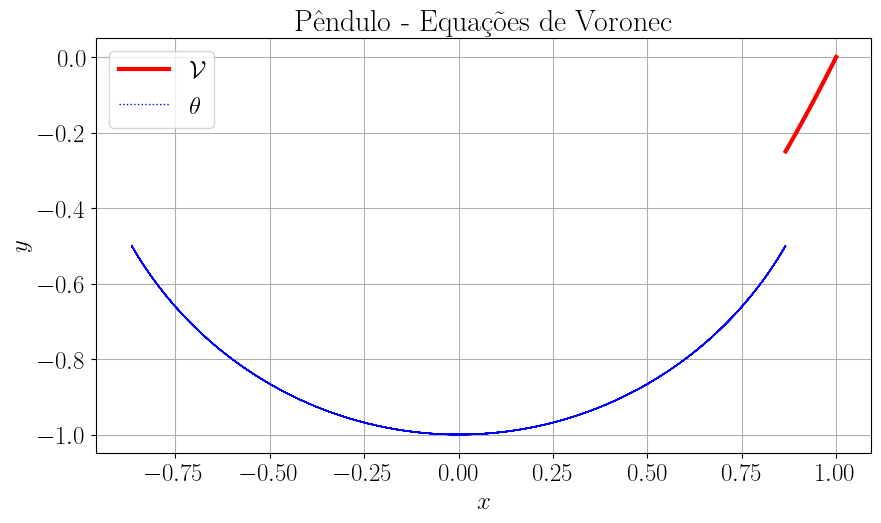

In [8]:
# Parâmetros do sistema
g = 9.81  # aceleração da gravidade
l = 1.0   # comprimento do pêndulo

# Intervalo de tempo para integração
t_start = 0.0
t_end = 20.0
t_step = 0.001
t_span = np.arange(t_start, t_end, t_step)

## VORONEC --------------------------------------------------------
def pendulum_vor(z, t):
    x = z[0]
    y = z[1]
    dx = z[2]
    dy = -x/y*dx
    return [dx, dy]

# Condições iniciais
z0 = [l*np.sin(np.pi/3), 0.0]  # z1(0), z2(0)

# Resolvendo o sistema de equações diferenciais
solution = odeint(pendulum_vor, z0, t_span)

# Obtendo as soluções para z1, z2, z3 e z4
x_sol = solution[:, 0]
y_sol = (l**2 - x_sol**2)

## TRADICIONAL --------------------------------------------------------
def pendulum_an(z, t):
    z1 = z[0]
    z2 = z[1]
    dz1_dt = z2
    dz2_dt = -g/l*np.sin(z1)
    return [dz1_dt, dz2_dt]

# Condições iniciais
z0 = [np.pi/3, 0.0]  # z1(0), z2(0)

# Resolvendo o sistema de equações diferenciais
solution_an = odeint(pendulum_an, z0, t_span)

# Obtendo as soluções para z1, z2
x_sol_an = l*np.sin(solution_an[:, 0])
y_sol_an = l*np.cos(solution_an[:, 0])

# Plotando as soluções
plt.figure(figsize=(10, 8))
plt.plot(x_sol, -y_sol, linestyle='-', color='red', linewidth=3, label=r'$\mathcal{V}$')
plt.plot(x_sol_an, -y_sol_an, linestyle=':', color='blue', linewidth=1, label=r'$\theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Pêndulo - Equações de Voronec')
plt.legend()
plt.grid(True)
# plt.xlim(-1.0,1.0)
# plt.ylim(-1.0,0.0)
plt.axis()
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()